In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import argparse
import sys

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
from matplotlib.patches import Rectangle
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
plt.rcParams['pdf.fonttype'] = 42
plt.switch_backend('agg')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
cov_min = 20
cov_max = 200
interval = 10
custom_interval = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 100]
r9_modkit = "/Users/gennerrm/Desktop/modkit_files/HG002_R9.hg38.modkit.comb.bed"
r10_modkit = "/Users/gennerrm/Desktop/modkit_files/HG002_R10.hg38.modkit.comb.bed"
bis_modkit = "/Users/gennerrm/Desktop/modkit_files/CpG.gz.bismark.zero.merged.cov"
bw = 0.1
scale = 'width'
binning = 'Bisulfite'
out_dir = '/Users/gennerrm/Desktop/figs/py_figs/HG002_bis'
sample_name = 'HG002'

In [3]:
select = {"chr1", "chr2", "chr3", "chr4",'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'}

print("Reading R9 data...")
R9_df = pd.read_csv(r9_modkit, sep="\t", header=None, engine="c",
    usecols=["chrom", "start", "end", "coverage", "freq", "mod", "canon"],
    dtype={
        "chrom":str, "start":int, "end":int, "name":str, "score":int, "strand":str,
        "start2":int, "end2":int, "color":str,
        "coverage":int, "freq":float, "mod":int, "canon":int, "other_mod":int, 'delete':int, 'fail':int, 'diff':int, 'no_call':int},
    names=[
        "chrom", "start", "end", "name", "score", "strand",
        "start2", "end2", "color",
        "coverage", "freq", "mod", "canon", "other_mod", "delete", "fail", 'diff', 'no_call'])

#filter for  chromosomes 1-22,X,Y,M and coverage > 20 and < 200
R9_df = R9_df.loc[
    (R9_df['chrom'].isin(select)) &
    (R9_df['coverage'] > cov_min) &
    (R9_df['coverage'] < cov_max)]

R9_df

Reading R9 data...


,chrom,start,end,coverage,freq,mod,canon
0,chr1,10468,10469,118,87.29,103,15
1,chr1,10470,10471,112,89.29,100,12
2,chr1,10483,10484,112,91.96,103,9
3,chr1,10488,10489,129,96.12,124,5
4,chr1,10492,10493,122,91.80,112,10
...,...,...,...,...,...,...,...
28797589,chrY,56887220,56887221,50,98.00,49,1
28797590,chrY,56887399,56887400,45,93.33,42,3
28797591,chrY,56887579,56887580,43,97.67,42,1
28797592,chrY,56887700,56887701,42,23.81,10,32


In [4]:
print("Reading R10 data...")
R10_df = pd.read_csv(r10_modkit,
    sep="\t", header=None, engine="c",
    usecols=["chrom", "start", "end", "coverage", "freq", "mod", "canon"],
    dtype={
        "chrom":str, "start":int, "end":int, "name":str, "score":int, "strand":str,
        "start2":int, "end2":int, "color":str,
        "coverage":int, "freq":float, "mod":int, "canon":int, "other_mod":int, 'delete':int, 'fail':int, 'diff':int, 'no_call':int},
    names=[
        "chrom", "start", "end", "name", "score", "strand",
        "start2", "end2", "color",
        "coverage", "freq", "mod", "canon", "other_mod", "delete", "fail", 'diff', 'no_call'])

#filter for coverage > 20 and < 200
R10_df = R10_df.loc[
    (R10_df['chrom'].isin(select)) &
    (R10_df['coverage'] > cov_min) &
    (R10_df['coverage'] < cov_max)]

R10_df

Reading R10 data...


,chrom,start,end,coverage,freq,mod,canon
0,chr1,10468,10469,80,97.50,78,2
1,chr1,10470,10471,82,95.12,78,4
2,chr1,10483,10484,92,95.65,88,4
3,chr1,10488,10489,98,100.00,98,0
4,chr1,10492,10493,111,99.10,110,1
...,...,...,...,...,...,...,...
28759848,chrY,56887098,56887099,89,94.38,84,5
28759849,chrY,56887220,56887221,68,100.00,68,0
28759850,chrY,56887399,56887400,68,98.53,67,1
28759851,chrY,56887579,56887580,66,100.00,66,0


In [5]:
print("Reading bisulfite data...")
bis_df = pd.read_csv(
    bis_modkit,
    sep="\t", header=None, engine="c",
    dtype={'chrom':str, 'start':int, 'end':int, 'freq.bis':float, 'mod':int, 'canon':int},
    names=['chrom', 'start', 'end', 'freq.bis', 'mod', 'canon']
)
bis_df["coverage.bis"] = bis_df["mod"] + bis_df["canon"]

#filter for coverage > 20 and < 200
bis_df = bis_df.loc[
    (bis_df['chrom'].isin(select)) &
    (bis_df['coverage.bis'] > cov_min) &
    (bis_df['coverage.bis'] < cov_max)]

bis_df

Reading bisulfite data...


,chrom,start,end,freq.bis,mod,canon,coverage.bis
0,chr1,10468,10469,92.857143,26,2,28
1,chr1,10470,10471,92.592593,25,2,27
2,chr1,10483,10484,83.333333,25,5,30
3,chr1,10488,10489,100.000000,31,0,31
4,chr1,10492,10493,77.419355,24,7,31
...,...,...,...,...,...,...,...
28098403,chrY,56887220,56887221,95.614035,109,5,114
28098404,chrY,56887399,56887400,92.982456,53,4,57
28098405,chrY,56887579,56887580,82.352941,42,9,51
28098406,chrY,56887581,56887582,0.000000,0,52,52


In [6]:
# inner merge to get dataframe with CpG sites that are shared between R9 and R10
R9_R10 = pd.merge(R9_df, R10_df, how="inner", on=["chrom", "start", "end"], suffixes=[".R9", ".R10"])
inner = pd.merge(R9_R10, bis_df, how="inner", on=["chrom", "start", "end"])

inner

,chrom,start,end,coverage.R9,freq.R9,mod.R9,canon.R9,coverage.R10,freq.R10,mod.R10,canon.R10,freq.bis,mod,canon,coverage.bis
0,chr1,10468,10469,118,87.29,103,15,80,97.50,78,2,92.857143,26,2,28
1,chr1,10470,10471,112,89.29,100,12,82,95.12,78,4,92.592593,25,2,27
2,chr1,10483,10484,112,91.96,103,9,92,95.65,88,4,83.333333,25,5,30
3,chr1,10488,10489,129,96.12,124,5,98,100.00,98,0,100.000000,31,0,31
4,chr1,10492,10493,122,91.80,112,10,111,99.10,110,1,77.419355,24,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24252584,chrY,56886650,56886651,50,50.00,25,25,83,51.81,43,40,41.104294,67,96,163
24252585,chrY,56887220,56887221,50,98.00,49,1,68,100.00,68,0,95.614035,109,5,114
24252586,chrY,56887399,56887400,45,93.33,42,3,68,98.53,67,1,92.982456,53,4,57
24252587,chrY,56887579,56887580,43,97.67,42,1,66,100.00,66,0,82.352941,42,9,51


In [7]:
# Create list (bins) of integers within given increment and range

def bin(interval):
    return list(range(0, 101, interval))    

if custom_interval is not None:
    bins = custom_interval
else:
    bins = bin(interval)
    
if binning == 'Bisulfite':
    binning_name = 'freq.bis'
else:
    binning_name = 'freq.' + binning

binning_name

'freq.bis'

In [8]:
#make subset dataframe with R9 and R10 frequency columns 
freqs = inner[['freq.R9', 'freq.R10', 'freq.bis']]

# this adds a column that rounds up each R9 methylation frequency to the tenths place - ex. 87.3.5 -> 90.0, and assigns the corresponding R10 value to that same interval regardless of its value
# This is binning the intervals according to R9. Could also bin by R10 by switching it to pd.cut(freqs['freq.R10'])

freqs['ints'] = pd.cut(freqs[binning_name], bins=bins)

#convert df from int to str
freqs = freqs.astype({'ints':'string'})

#delete the start value of the interval so it's just one number - so (90.0, 100.0] becomes 100 - and then convert back to float 
freqs['ints'] = freqs['ints'].str[1:-1]
freqs[['int_start', 'int_end']] = freqs.ints.str.split(',', expand=True)
freqs['int_end'] = freqs['int_end'].astype(float)

#grab only these columns 
freqs = freqs[['freq.R9', 'freq.R10', 'freq.bis', 'int_end']]

freqs

/var/folders/j1/3pvq78vd5lvcvg4f6v4ct63w44fvfw/T/ipykernel_13880/2849052867.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freqs['ints'] = pd.cut(freqs[binning_name], bins=bins)


,freq.R9,freq.R10,freq.bis,int_end
0,87.29,97.50,92.857143,95.0
1,89.29,95.12,92.592593,95.0
2,91.96,95.65,83.333333,90.0
3,96.12,100.00,100.000000,100.0
4,91.80,99.10,77.419355,80.0
...,...,...,...,...
24252584,50.00,51.81,41.104294,50.0
24252585,98.00,100.00,95.614035,100.0
24252586,93.33,98.53,92.982456,95.0
24252587,97.67,100.00,82.352941,90.0


In [9]:
# add two columns with R9 and R10 for when I separate them out later 
freqs.insert(1, 'R9', 'R9')
freqs.insert(2, 'R10', 'R10')
freqs.insert(3, 'bis', 'bis')
freqs

,freq.R9,R9,R10,bis,freq.R10,freq.bis,int_end
0,87.29,R9,R10,bis,97.50,92.857143,95.0
1,89.29,R9,R10,bis,95.12,92.592593,95.0
2,91.96,R9,R10,bis,95.65,83.333333,90.0
3,96.12,R9,R10,bis,100.00,100.000000,100.0
4,91.80,R9,R10,bis,99.10,77.419355,80.0
...,...,...,...,...,...,...,...
24252584,50.00,R9,R10,bis,51.81,41.104294,50.0
24252585,98.00,R9,R10,bis,100.00,95.614035,100.0
24252586,93.33,R9,R10,bis,98.53,92.982456,95.0
24252587,97.67,R9,R10,bis,100.00,82.352941,90.0


In [10]:
freqs_dict = {}
R9_freqs = {}
R10_freqs = {}
bis_freqs = {}

R9_R10_combined={}

for i in bins: 
    freqs_dict[i] = freqs.loc[freqs['int_end'] == float(i)]
    for row in freqs_dict:
        R9_freqs[i] = freqs_dict[i][['R9','freq.R9', 'int_end']] 
        R9_freqs[i] = R9_freqs[i].rename(columns={'R9':'R', 'freq.R9':'freq'})
        R10_freqs[i] = freqs_dict[i][['R10','freq.R10', 'int_end']]
        R10_freqs[i] = R10_freqs[i].rename(columns={'R10':'R', 'freq.R10':'freq'})
        bis_freqs[i] = freqs_dict[i][['bis','freq.bis', 'int_end']]
        bis_freqs[i] = bis_freqs[i].rename(columns={'bis':'R', 'freq.bis':'freq'})

#R9_R10_combined = pd.concat([R9_freqs[0], R9_freqs[5], R9_freqs[10], R9_freqs[20], R9_freqs[30], R9_freqs[40], R9_freqs[50], R9_freqs[60], R9_freqs[70], R9_freqs[80], R9_freqs[90], R9_freqs[95], R9_freqs[100], R10_freqs[0], R10_freqs[5], R10_freqs[10], R10_freqs[20], R10_freqs[30], R10_freqs[40], R10_freqs[50], R10_freqs[60], R10_freqs[70], R10_freqs[80], R10_freqs[90], R10_freqs[95], R10_freqs[100]], axis=0)
#R9_R10_combined

R9_combined = pd.concat({**R9_freqs})
R10_combined = pd.concat({**R10_freqs})
R9_R10_combined = pd.concat([R9_combined, R10_combined])

R9_R10_combined

R    freq  int_end
5   459        R9   24.56      5.0
    481        R9    0.00      5.0
    482        R9    0.00      5.0
    483        R9    6.45      5.0
    484        R9    8.82      5.0
...           ...     ...      ...
100 24252261  R10   89.47    100.0
    24252279  R10   80.00    100.0
    24252285  R10   73.08    100.0
    24252528  R10   86.99    100.0
    24252585  R10  100.00    100.0

[46190764 rows x 3 columns]

In [11]:
x_axis = []

bin_len = list(range(0, len(bins)-1, 1))

for i in bin_len:
    z = str([bins[i],bins[i+1]])
    x_axis.append(z)

x_axis

['[0, 5]',
 '[5, 10]',
 '[10, 20]',
 '[20, 30]',
 '[30, 40]',
 '[40, 50]',
 '[50, 60]',
 '[60, 70]',
 '[70, 80]',
 '[80, 90]',
 '[90, 95]',
 '[95, 100]']

/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

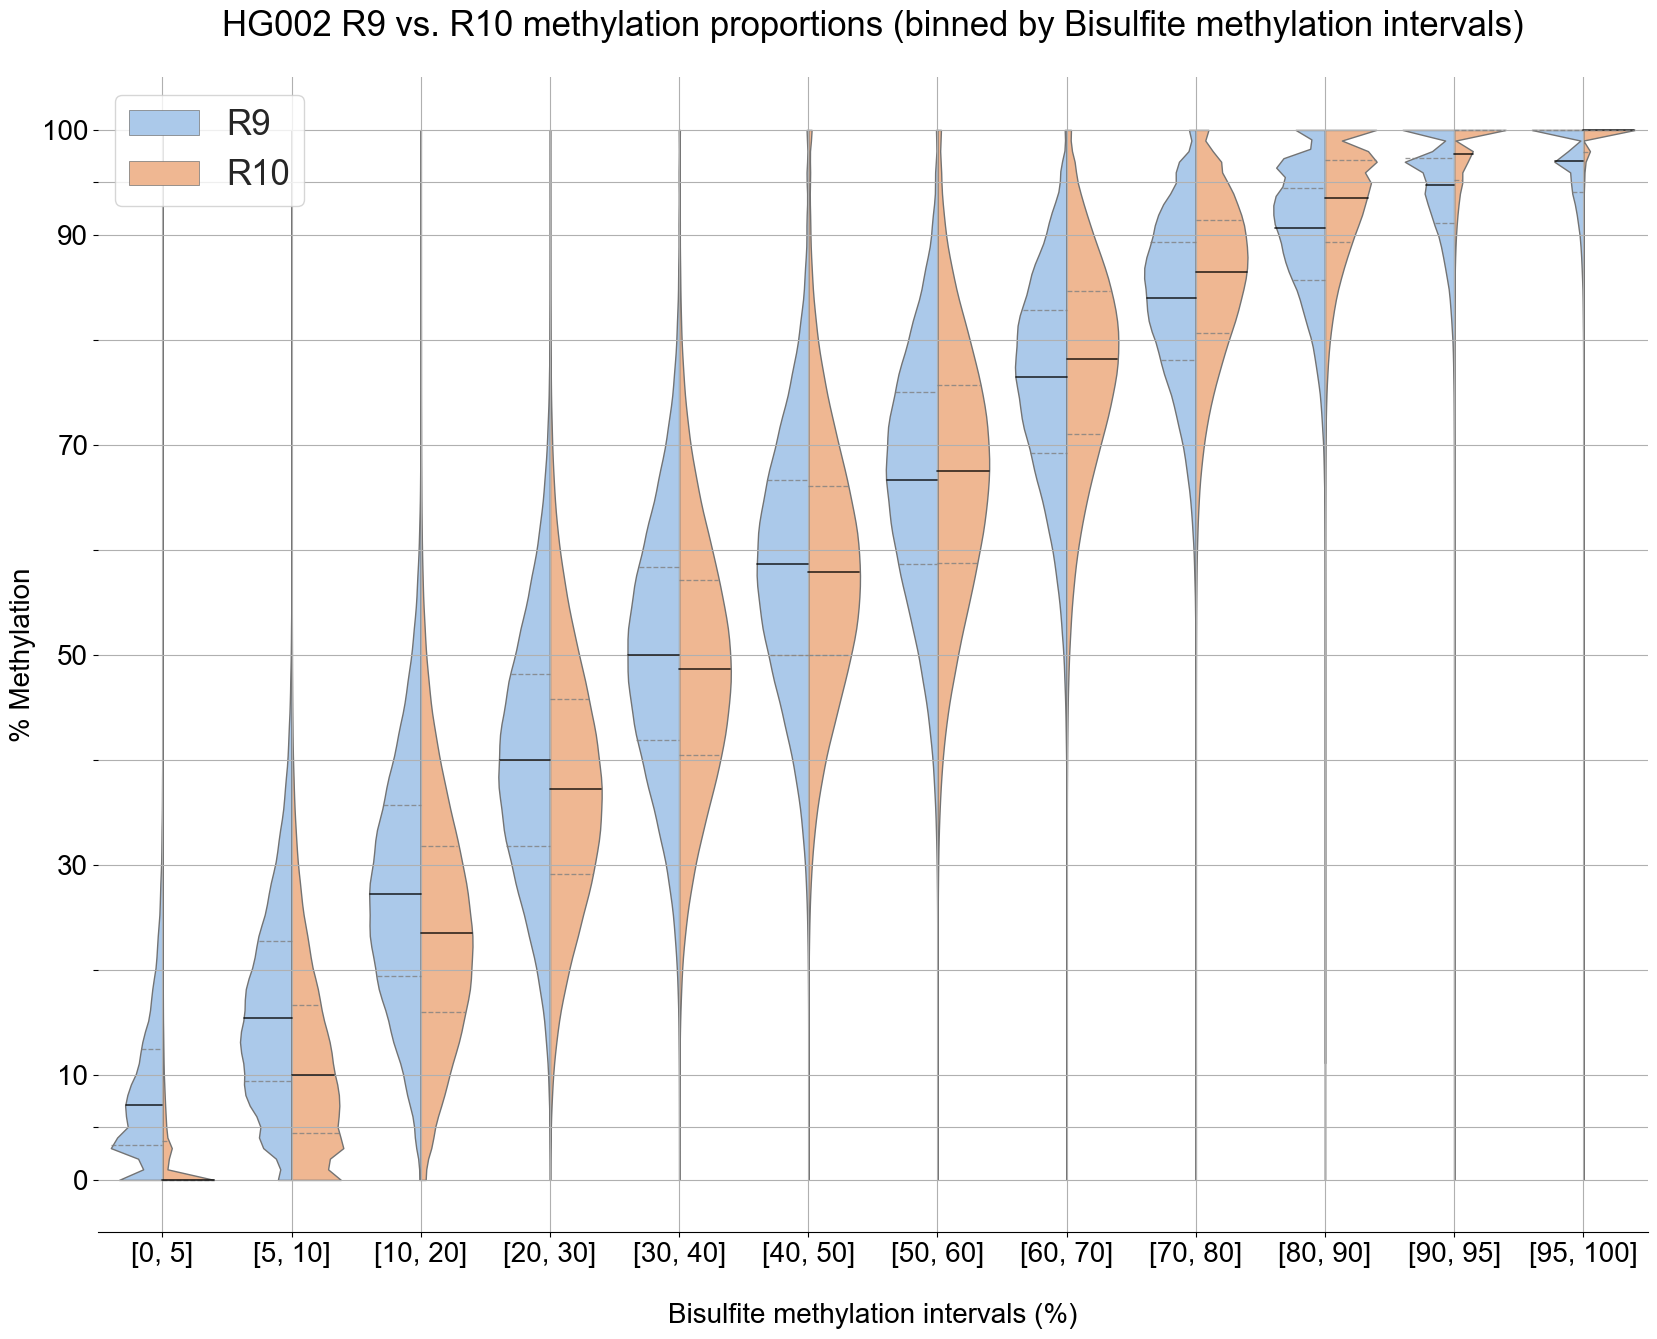

In [12]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.set_style("whitegrid", {'axes.grid' : True})

sns.violinplot(data=R9_R10_combined, x="int_end", y="freq", hue='R', split='TRUE', cut=0, inner='quartile', linewidth=1, bw=bw, scale=scale, ax=ax, palette="pastel")


ax.set_yticks(bins)
ax.set_yticklabels(bins, fontsize=20)
ax.set_xticklabels(x_axis, fontsize=20)
ax.set_xlabel(f"{binning} methylation intervals (%)", fontsize=20, labelpad=25)
ax.set_ylabel("% Methylation", fontsize=20)
plt.grid()
plt.legend(fontsize=25)
plt.title(f"{sample_name} R9 vs. R10 methylation proportions (binned by {binning} methylation intervals)", fontsize=25, pad=30)
sns.despine(left=True)

n=2
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]

#change color, thickness and style of quartile lines
for l in ax.lines:
    l.set_linestyle('--')
    l.set_linewidth(0.95)
    l.set_color('grey')
    l.set_alpha(0.8)
for l in ax.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1.2)
    l.set_color('black')
    l.set_alpha(0.8)
    
#plt.savefig(f'{out_dir}/{sample_name}_VP.jpg', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_VP.png', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_VP.svg', dpi=300)

plt.show()


In [13]:
R9_meds = []
R10_meds = []

bis_meds = []
for i in bins:
    R9_meds.append(R9_freqs[i]['freq'].median())
    R10_meds.append(R10_freqs[i]['freq'].median())
    bis_meds.append(bis_freqs[i]['freq'].median())


meds = pd.DataFrame({'bins':bins, 'R9': R9_meds, 'R10': R10_meds, 'Bisulfite':bis_meds})
meds["bins"] = meds["bins"].astype("str")

meds

,bins,R9,R10,Bisulfite
0,0,NaN,NaN,NaN
1,5,7.14,0.00,1.923077
2,10,15.38,10.00,7.142857
3,20,27.27,23.53,14.912281
4,30,40.00,37.21,25.233645
5,40,50.00,48.65,35.416667
6,50,58.62,57.89,45.454545
7,60,66.67,67.50,55.045872
8,70,76.47,78.18,65.289256
9,80,84.00,86.49,75.555556


/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to Na

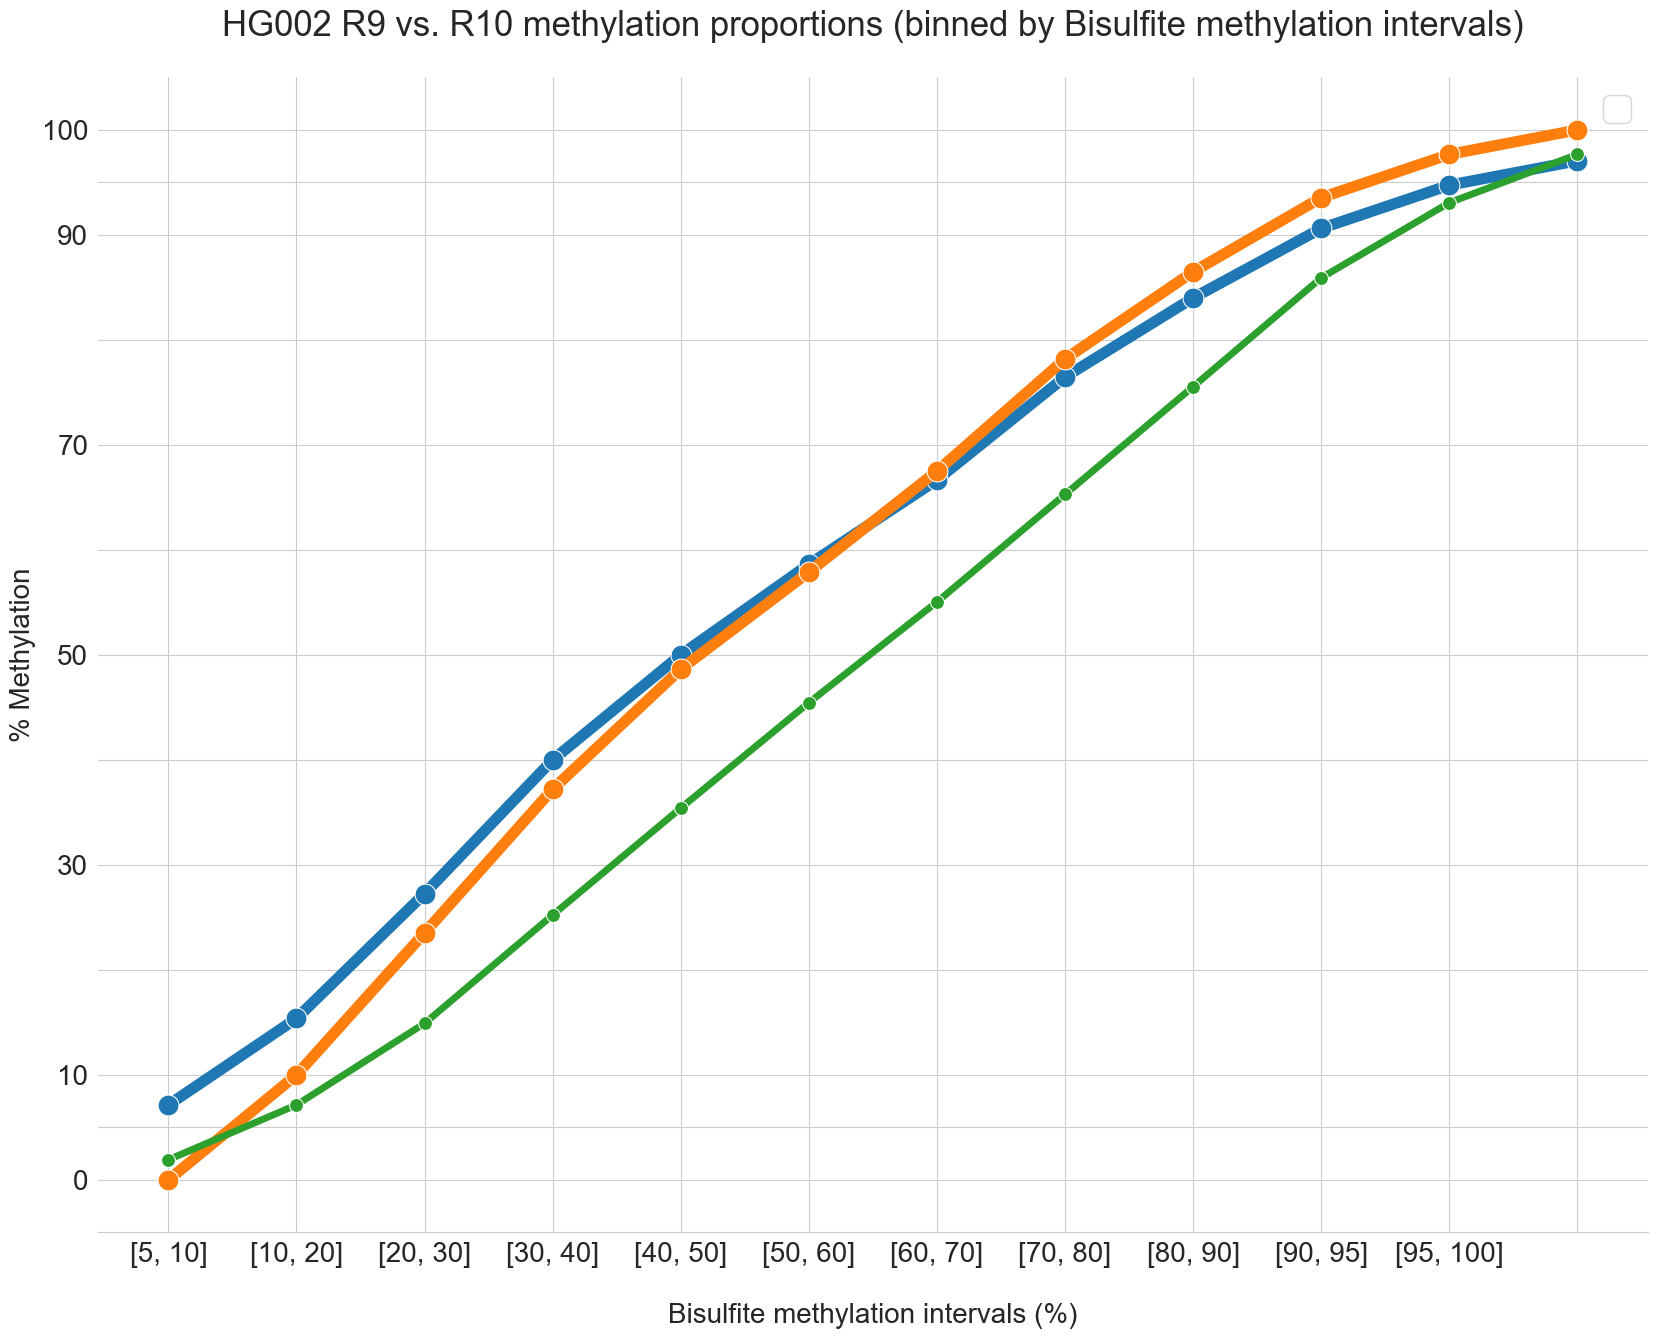

In [22]:
# Code for lineplot connecting median values

fig, ax = plt.subplots(figsize=(20, 15))
sns.set_style("whitegrid",{'axes.grid' : True})

sns.lineplot(x='bins', y='R9', data=meds, marker='o', markersize=15, linewidth=8, color='tab:blue')
sns.lineplot(x='bins', y='R10', data=meds, marker='o', markersize=15, linewidth=8, color='tab:orange')
sns.lineplot(x='bins', y='Bisulfite', data=meds, marker='o', markersize=10, linewidth=5, color='tab:green')

ax.set_yticks(bins)
ax.set_yticklabels(bins, fontsize=20)
ax.set_xticklabels(x_axis, fontsize=20)
ax.set_xlabel(f"{binning} methylation intervals (%)", fontsize=20, labelpad=25)
ax.set_ylabel("% Methylation", fontsize=20)
ax.grid()
plt.grid()
plt.legend(fontsize=25)
plt.title(f"{sample_name} R9 vs. R10 methylation proportions (binned by {binning} methylation intervals)", fontsize=25, pad=30)

sns.despine(left=True)
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % n != 0]

plt.savefig(f'{out_dir}/{sample_name}_{binning}bins_lines.jpg', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_{binning}bins_lines.png', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_{binning}bins_lines.svg', dpi=300)

plt.show()


/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gennerrm/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

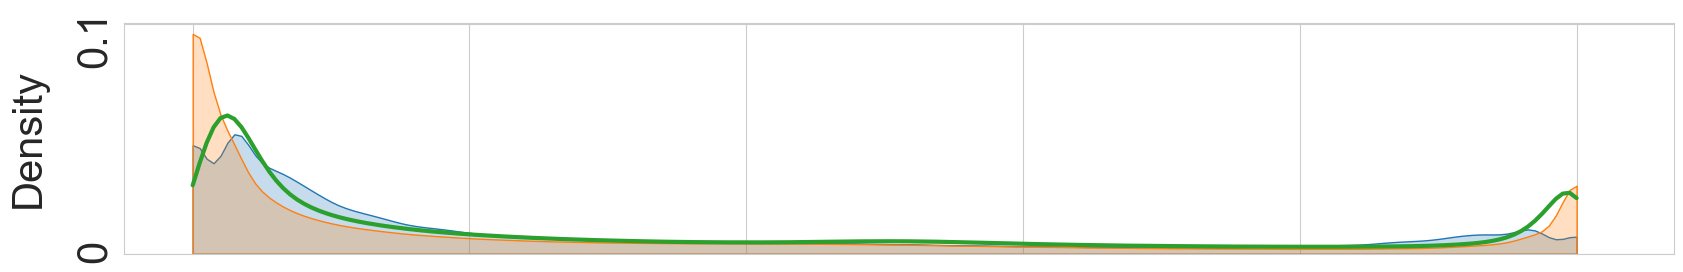

In [15]:
# Code for side graph with methylation distribution
# the graph has to be rotated since it will be added to the side of the violin plot, so axis labels are descending instead of ascending


sns.set_palette("pastel")
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20, 3))

sns.kdeplot(inner['freq.R9'], ax=ax, label='R9', color='tab:blue', cut=0, fill=True)
sns.kdeplot(inner['freq.R10'], ax=ax, label='R10', color='tab:orange', cut=0, fill=True)
sns.kdeplot(inner['freq.bis'], ax=ax, label='bis', color='tab:green', linewidth=3, cut=0)

ax.set_yticks((0.00, 0.10))
ax.set_yticklabels(('0', '0.1'), fontsize=30)

# graph has to be rotated
ax.tick_params(axis='y', labelrotation = 90)

#set x axis limit
ax.set_xlim(105, -7)

plt.xticks(visible=False)
ax.set_ylabel('Density', fontsize=30, labelpad=20)
ax.set_xlabel(None)

#plt.savefig(f'{out_dir}/{sample_name}_VP_cov.jpg', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_VP_cov.png', dpi=300)
#plt.savefig(f'{out_dir}/{sample_name}_VP_cov.svg', dpi=300)

plt.show()


